#**Intel Image Classification**

#Installing Libraries

In [ ]:
import zipfile, os
import shutil
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
import tensorflow.keras.utils

#Importing Data

In [ ]:
#Fetching data
# downloading the files from dropbox
!wget --no-check-certificate  "https://uofi.box.com/shared/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip" -O dataset.zip

#extracting the zip file download
zip_ref = zipfile.ZipFile('dataset.zip', 'r')
zip_ref.extractall()

--2020-11-07 18:03:31--  https://uofi.box.com/shared/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Resolving uofi.box.com (uofi.box.com)... 185.235.236.197
Connecting to uofi.box.com (uofi.box.com)|185.235.236.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip [following]
--2020-11-07 18:03:31--  https://uofi.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip [following]
--2020-11-07 18:03:31--  https://uofi.app.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Resolving uofi.app.box.com (uofi.app.box.com)... 185.235.236.201
Connecting to uofi.app.box.com (uofi.app.box.com)|185.235.236.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.b

#Counting Images in Every Category

In [ ]:
print('Training: total buildings:', len(os.listdir('intel/seg_train/buildings')))
print('Training: total street:', len(os.listdir('intel/seg_train/street')))
print('Training: total forest:', len(os.listdir('intel/seg_train/forest')))
print('Training: total glacier:', len(os.listdir('intel/seg_train/glacier')))
print('Training: total mountain:', len(os.listdir('intel/seg_train/mountain')))
print('Training: total sea:', len(os.listdir('intel/seg_train/sea')))
print('\n')
print('\n')
print('Testing: total buildings:', len(os.listdir('intel/seg_test/buildings')))
print('Testing: total street:', len(os.listdir('intel/seg_test/street')))
print('Testing: total forest:', len(os.listdir('intel/seg_test/forest')))
print('Testing: total glacier:', len(os.listdir('intel/seg_test/glacier')))
print('Testing: total mountain:', len(os.listdir('intel/seg_test/mountain')))
print('Testing: total sea:', len(os.listdir('intel/seg_test/sea')))

Training: total buildings: 2191
Training: total street: 2382
Training: total forest: 2271
Training: total glacier: 2404
Training: total mountain: 2512
Training: total sea: 2274




Testing: total buildings: 437
Testing: total street: 501
Testing: total forest: 474
Testing: total glacier: 553
Testing: total mountain: 525
Testing: total sea: 510


##Creating Validation Directory & Redirecting Data to Subdirectories

In [ ]:
valDir = 'seg_val'
baseDir = 'intel'
trainDir = 'seg_train'
testDir = 'seg_test'

if(os.path.exists(os.path.join(baseDir, valDir))):
    shutil.rmtree(os.path.join(baseDir, valDir))
    
os.mkdir(os.path.join(baseDir, valDir))

split_perc = 0.20

for dir in os.listdir(os.path.join(baseDir, trainDir)):
  os.mkdir(os.path.join(baseDir, valDir, dir))
  valCount = math.ceil(len(os.listdir(os.path.join(baseDir, trainDir, dir))) * split_perc)
  catDir = os.listdir(os.path.join(baseDir, trainDir, dir))

  for file in random.sample(catDir, valCount):
    shutil.move(os.path.join(baseDir, trainDir, dir, file), os.path.join(baseDir, valDir, dir, file))

###Training and Validation Data Redirection

In [ ]:

for dir in os.listdir(os.path.join(baseDir, trainDir)):
  print('Cumulative images (training) : ', dir,':', len(os.listdir(os.path.join(baseDir, trainDir, dir))))
print('\n')


for dir in os.listdir(os.path.join(baseDir, valDir)):
  print('Cumulative images (validation) : ', dir,':', len(os.listdir(os.path.join(baseDir, valDir, dir))))


Cumulative images (training) :  street : 1905
Cumulative images (training) :  buildings : 1752
Cumulative images (training) :  sea : 1819
Cumulative images (training) :  mountain : 2009
Cumulative images (training) :  forest : 1816
Cumulative images (training) :  glacier : 1923


Cumulative images (validation) :  street : 477
Cumulative images (validation) :  buildings : 439
Cumulative images (validation) :  sea : 455
Cumulative images (validation) :  mountain : 503
Cumulative images (validation) :  forest : 455
Cumulative images (validation) :  glacier : 481


###Creating Image Data Generators for Train and Validation Sets

In [ ]:
train_dir = os.path.join(baseDir, trainDir)
validation_dir = os.path.join(baseDir, valDir)

# Objects named imageDataGenerator for each respective set of data. The rescaling value rescale=1./255 enables image normalization by dividing individual values of every pixel by 255.
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE=50

train_generator = train_datagen.flow_from_directory(
  #Retrieving training data from this directory:
  train_dir,
  #Images are resized to 150*150
  target_size=(150, 150),
  #Defining minibatch size: 
  batch_size=BATCH_SIZE,
  #sparse is used as labels are encoded as integers
  class_mode='sparse')


validation_generator = val_datagen.flow_from_directory(
    #Directory retrieving train data:
    validation_dir,
    #Image resized to 150*150
    target_size=(150, 150),
    #Defining minibatch size: 
    batch_size=BATCH_SIZE,
    #Used the following as the loss function will pertain as sparse_categorical_crossentropy. the labels are encoded as integer labels
    class_mode='sparse')


Found 11224 images belonging to 6 classes.
Found 2810 images belonging to 6 classes.


#Developing Baseline CNN Model

##Model Architecture

In [ ]:
def build_baseline():
  model=keras.Sequential(
    [
        # First Convolution Layer & Max Pooling Layer  
        layers.Conv2D(32, (3, 3), activation='relu', padding="same",input_shape=(150, 150, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        # Second Convolution Layer & Max Pooling Layer
        layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Third Convolution Layer & Max Pooling Layer
        layers.Conv2D(128, (3, 3), padding="same",activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        # Fourth Convolution Layer & Max Pooling Layer
        layers.Conv2D(128, (3, 3), padding="same",activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        #Global Average Pooling Layer
        layers.GlobalAveragePooling2D(),

        # Sigmoid Activation in a Dense Output Layer   
        layers.Dense(6, activation= 'softmax')
    ])
  
# Model Compilation
  
  #Learning Rate Scheduling
  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

  #Configuration and compilation
  opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
 
  return model

model=build_baseline()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

###Model Training

In [ ]:
#For Early Stopping Instantiating Callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=1e-3, restore_best_weights=True)

#Training
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = math.ceil(train_generator.samples/BATCH_SIZE) ,
            epochs = 60,
            validation_steps = math.ceil(validation_generator.samples/BATCH_SIZE),
            callbacks=callback,
            verbose = 1)

model.save("intel-baseline.h5")

Epoch 1/60
225/225 [==============================] - 18s 79ms/step - loss: 0.8707 - accuracy: 0.6811 - val_loss: 3.3037 - val_accuracy: 0.1619
Epoch 2/60
225/225 [==============================] - 17s 76ms/step - loss: 0.6331 - accuracy: 0.7742 - val_loss: 1.9531 - val_accuracy: 0.3843
Epoch 3/60
225/225 [==============================] - 17s 75ms/step - loss: 0.5521 - accuracy: 0.8108 - val_loss: 0.6265 - val_accuracy: 0.7648
Epoch 4/60
225/225 [==============================] - 17s 75ms/step - loss: 0.5132 - accuracy: 0.8175 - val_loss: 0.5227 - val_accuracy: 0.8093
Epoch 5/60
225/225 [==============================] - 17s 75ms/step - loss: 0.4685 - accuracy: 0.8364 - val_loss: 0.4815 - val_accuracy: 0.8256
Epoch 6/60
225/225 [==============================] - 17s 74ms/step - loss: 0.4347 - accuracy: 0.8520 - val_loss: 0.4413 - val_accuracy: 0.8512
Epoch 7/60
225/225 [==============================] - 17s 74ms/step - loss: 0.4100 - accuracy: 0.8605 - val_loss: 0.4414 - val_accuracy:

###Learning Curves

In [ ]:
# To plot accuracy and loss, we first define the following function:
def plot_measures(historyObj):

  #Defining Accuracies for Training and Validation:
  train_acc_CNN = historyObj.history['accuracy']
  val_acc_CNN = historyObj.history['val_accuracy']

  #Defining Losses for Training and Validation:
  train_loss_CNN = historyObj.history['loss']
  val_loss_CNN = historyObj.history['val_loss']
  epochs = range(1, len(train_loss_CNN) + 1)

  #Accuracy Plots:
  plt.plot(epochs, train_acc_CNN, 'b', label='Training Accuracies')
  plt.plot(epochs, val_acc_CNN, 'r', label='Validation Accuracies')
  plt.title('Training & Validation Accuracies for the model')
  plt.legend()
  plt.figure()

  #Loss Plots:
  plt.plot(epochs, train_loss_CNN, 'b', label='Training Losses')
  plt.plot(epochs, val_loss_CNN, 'r', label='Validation Losses')
  plt.title('Training & Validation Losses for the model')
  plt.legend()

  plt.show()

  return

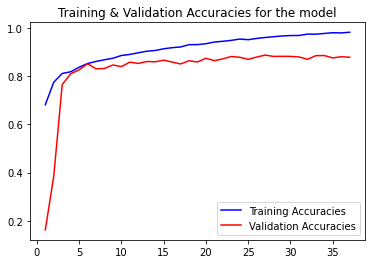

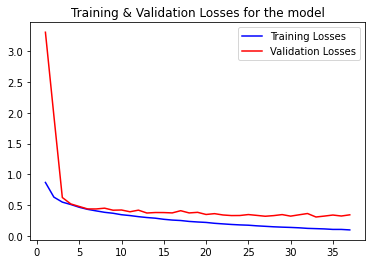

In [ ]:
plot_measures(history)

**NOTE**: Mild overfitting can be deduced from this model. The increase in epochs and accuracies display a directly proportional relationship- as epochs increase, so does the accuracy. Validation accuracy illustrates slight irregularities with accuracy fluctuations.
The losses represent an inversely proportional relationship with the number of epochs- decrease in losses as epochs increase.


The drastic aspects of these plots can be found within the initial epochs- accuracies displaying massive increase and losses possessing a large decrease. These behaviours gradually stabilize, but remain steady in their progressive trend as the number of epochs increase. 

Validation Accuracy meanders around 85% but is increasing slowly nonetheless. Additional epochs would further substantiate increased accuracy.
Since the model does not overfit, we will try increasing the capacity of the model by adding a few more convolutional layers:

####Increasing Model Capacity

In [ ]:
model=keras.Sequential(
  [
      # First Convolutional Layer & Max Pooling Layer  
      layers.Conv2D(32, (3, 3), activation='relu', padding="same",input_shape=(150, 150, 3)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Second Convolutional Layer & Max Pooling Layer 
      layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Third Convolutional Layer & Max Pooling Layer 
      layers.Conv2D(128, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Fourth Convolutional Layer & Max Pooling Layer 
      layers.Conv2D(256, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Fifth Convolutional Layer & Max Pooling Layer 
      layers.Conv2D(256, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      #Global Average Pooling Layer
      layers.GlobalAveragePooling2D(),

      #Sigmoid Activation in a Dense Output Layer   
      layers.Dense(6, activation= 'softmax')
  ])

# Model Compilation

#Learning Rate Scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=1e-4,
  decay_steps=1000,
  decay_rate=0.9)

#Model Compilation & Configuration 
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

#Early Stopping Callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=1e-3, restore_best_weights=True)

#Training
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = math.ceil(train_generator.samples/BATCH_SIZE) ,
            epochs = 100,
            validation_steps = math.ceil(validation_generator.samples/BATCH_SIZE),
            callbacks=callback,
            verbose = 1)

Epoch 1/100
225/225 [==============================] - 17s 75ms/step - loss: 0.7329 - accuracy: 0.7287 - val_loss: 2.8322 - val_accuracy: 0.1619
Epoch 2/100
225/225 [==============================] - 17s 75ms/step - loss: 0.4949 - accuracy: 0.8234 - val_loss: 0.9782 - val_accuracy: 0.5989
Epoch 3/100
225/225 [==============================] - 17s 74ms/step - loss: 0.4054 - accuracy: 0.8570 - val_loss: 0.5028 - val_accuracy: 0.8292
Epoch 4/100
225/225 [==============================] - 17s 75ms/step - loss: 0.3283 - accuracy: 0.8883 - val_loss: 0.4848 - val_accuracy: 0.8270
Epoch 5/100
225/225 [==============================] - 17s 76ms/step - loss: 0.2623 - accuracy: 0.9175 - val_loss: 0.4059 - val_accuracy: 0.8548
Epoch 6/100
225/225 [==============================] - 17s 76ms/step - loss: 0.2103 - accuracy: 0.9342 - val_loss: 0.5553 - val_accuracy: 0.8160
Epoch 7/100
225/225 [==============================] - 17s 76ms/step - loss: 0.1567 - accuracy: 0.9582 - val_loss: 0.5287 - val_ac

####Learning Curves

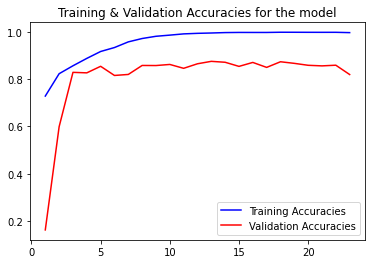

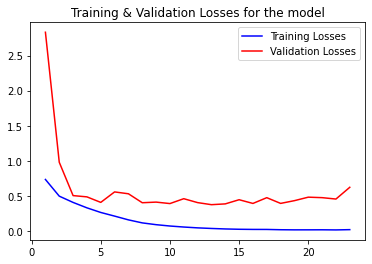

In [ ]:
plot_measures(history)

**NOTE**: These two graphs illustrate some overfitting, now that we have increased model capacity. There is also a slight difference in the prevalence of variating increase-decrease peaks in validation accuracy/losses, thereby concluding that adding a few convolutional layers was benefitial to the model overall. Training accuracies and losses remain marginally the same.

##Incorporating Dense Layers with RelU Activation

In [ ]:
model=keras.Sequential(
  [
      # First Convolutional Layer & Max Pooling Layer  
      layers.Conv2D(32, (3, 3), activation='relu', padding="same",input_shape=(150, 150, 3)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Second Convolutional Layer & Max Pooling Layer
      layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Third Convolutional Layer & Max Pooling Layer
      layers.Conv2D(128, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Fourth Convolutional Layer & Max Pooling Layer
      layers.Conv2D(256, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Fifth Convolutional Layer & Max Pooling Layer
      layers.Conv2D(256, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      #Global Average Pooling Layer
      layers.GlobalAveragePooling2D(),
      # Fully Connected Layer / Dense Layer
      layers.Dense(128, activation='relu'),
      # Initial Dropout
      layers.Dropout(0.5),
      # Second Fully Connected Layer / Dense Layer 2
      layers.Dense(64, activation='relu'),
      # Second Dropout
      layers.Dropout(0.5),
      # Sigmoid Activation in Dense Output Layer   
      layers.Dense(6, activation= 'softmax')
  ])

#Model Compilation

#Learning Rate Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=1e-4,
  decay_steps=1000,
  decay_rate=0.9)

#Compilation
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

#Early Stopping Callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=1e-3, restore_best_weights=True)

#Training Model
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = math.ceil(train_generator.samples/BATCH_SIZE) ,
            epochs = 120,
            validation_steps = math.ceil(validation_generator.samples/BATCH_SIZE),
            callbacks=callback,
            verbose = 1)

Epoch 1/120
225/225 [==============================] - 18s 78ms/step - loss: 1.4036 - accuracy: 0.4668 - val_loss: 1.9772 - val_accuracy: 0.1683
Epoch 2/120
225/225 [==============================] - 17s 77ms/step - loss: 1.0251 - accuracy: 0.6227 - val_loss: 1.3208 - val_accuracy: 0.4840
Epoch 3/120
225/225 [==============================] - 17s 77ms/step - loss: 0.8488 - accuracy: 0.6978 - val_loss: 0.6431 - val_accuracy: 0.7783
Epoch 4/120
225/225 [==============================] - 17s 77ms/step - loss: 0.7388 - accuracy: 0.7429 - val_loss: 0.8289 - val_accuracy: 0.7224
Epoch 5/120
225/225 [==============================] - 17s 77ms/step - loss: 0.6727 - accuracy: 0.7748 - val_loss: 0.5036 - val_accuracy: 0.8203
Epoch 6/120
225/225 [==============================] - 17s 77ms/step - loss: 0.6152 - accuracy: 0.7962 - val_loss: 0.4809 - val_accuracy: 0.8292
Epoch 7/120
225/225 [==============================] - 17s 77ms/step - loss: 0.5615 - accuracy: 0.8181 - val_loss: 0.4975 - val_ac

####Learning Curves

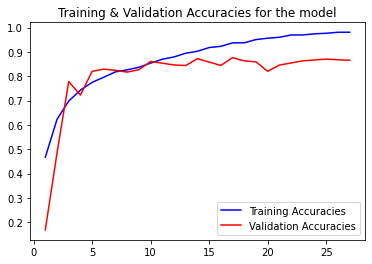

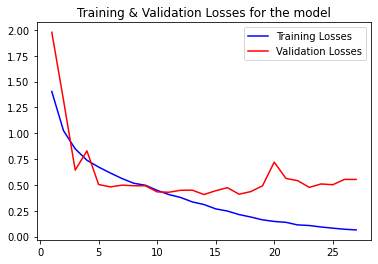

In [ ]:
plot_measures(history)

**NOTE**: The addition of dense layers preceding the output layer aided regularization within the network and reversed overfitting. In comparison to our previous learning curve plots, we see here that the validation accuracy is far lower than training accuracy.

#Introducing Data Augmentation

In [ ]:
# Using Transformation Metrics to Initialize imageDataGenerator once again

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
#Fetching training data from directory
train_dir,
#Resizing images to size 150*150
target_size=(150, 150),
#Size of minibatch 
batch_size=20,
class_mode='sparse')

Found 11224 images belonging to 6 classes.


##Augmented Data Model Training

In [ ]:
model=keras.Sequential(
  [
      # First Convolutional Layer & Max Pooling Layer 
      layers.Conv2D(32, (3, 3), activation='relu', padding="same",input_shape=(150, 150, 3)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Second Convolutional Layer & Max Pooling Layer
      layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Third Convolutional Layer & Max Pooling Layer
      layers.Conv2D(128, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Fourth Convolutional Layer & Max Pooling Layer
      layers.Conv2D(256, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      # Fifth Convolutional Layer & Max Pooling Layer
      layers.Conv2D(256, (3, 3), padding="same",activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2, 2)),
      #Global Average Pooling Layer
      layers.GlobalAveragePooling2D(),
      # First Fully Connected Layer/Dense Layer
      layers.Dense(128, activation='relu'),
      # Initial Dropout
      layers.Dropout(0.5),
      # Second Fully Connected Layer/Dense Layer
      layers.Dense(64, activation='relu'),
      # Second Dropout
      layers.Dropout(0.5),
      # Sigmoid Activation in Dense Output Layer  
      layers.Dense(6, activation= 'softmax')
  ])

#Compilation

#Learning Rate Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=1e-4,
  decay_steps=1000,
  decay_rate=0.9)

#Configuration
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

#Early Stopping Callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=1e-3, restore_best_weights=True)

#Training
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = math.ceil(train_generator.samples/BATCH_SIZE) ,
            epochs = 120,
            validation_steps = math.ceil(validation_generator.samples/BATCH_SIZE),
            callbacks=callback,
            verbose = 1)

Epoch 1/120
225/225 [==============================] - 30s 135ms/step - loss: 1.6359 - accuracy: 0.3676 - val_loss: 2.0351 - val_accuracy: 0.1712
Epoch 2/120
225/225 [==============================] - 31s 136ms/step - loss: 1.3549 - accuracy: 0.4736 - val_loss: 1.4434 - val_accuracy: 0.4260
Epoch 3/120
225/225 [==============================] - 30s 135ms/step - loss: 1.2766 - accuracy: 0.5123 - val_loss: 1.0604 - val_accuracy: 0.6021
Epoch 4/120
225/225 [==============================] - 30s 135ms/step - loss: 1.2122 - accuracy: 0.5292 - val_loss: 0.9932 - val_accuracy: 0.6199
Epoch 5/120
225/225 [==============================] - 31s 136ms/step - loss: 1.1572 - accuracy: 0.5593 - val_loss: 1.0097 - val_accuracy: 0.6253
Epoch 6/120
225/225 [==============================] - 30s 135ms/step - loss: 1.0703 - accuracy: 0.5977 - val_loss: 0.9027 - val_accuracy: 0.6868
Epoch 7/120
225/225 [==============================] - 30s 135ms/step - loss: 1.0834 - accuracy: 0.5979 - val_loss: 0.8581 -

#### Learning Curves

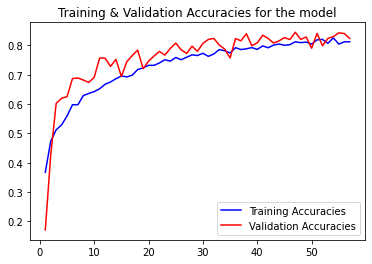

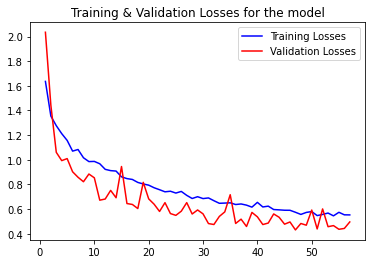

In [ ]:
plot_measures(history)

**NOTE**: It is apparent that there is no prevalence of overfitting in the model. Validation accuracy, despite it's sharp upward and downward peaks is projected to be better than the Training accuracy. The accuracy in our previous plots meandered at around a value of 85%, but we see here that it has come down to around 82% or so. 

#Transfer Learning

Extracting features

In [ ]:
#Importing the Trained Model

#Using a DenseNet121 model trained on ImageNet dataset
from tensorflow.keras.applications import DenseNet121
conv_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

#Freezing convolutional base weight
conv_base.trainable=False

29089792/29084464 [==============================] - 1s 0us/step


In [ ]:
#Adding a Fully Connected/Dense Layer at the beginning
#Over the convolutional base (densenet) outpupt, set a topclassifier.
topClassifier = conv_base.output

#On top of the convolutional base, set a Global Average Pooling layer.
topClassifier=layers.GlobalAveragePooling2D()(topClassifier)

#For classification purposes, place and incorporate a dense layer preceding the Global Average Pooling layer.
topClassifier = layers.Dense(6, activation="softmax")(topClassifier)

model = Model(inputs=conv_base.input, outputs=topClassifier)

In [ ]:
#Training

#Learning Rate Scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

#Compilation of Model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

#Early Stopping Callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=1e-3, restore_best_weights=True)

#Training
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = math.ceil(train_generator.samples/BATCH_SIZE) ,
            epochs = 120,
            validation_steps = math.ceil(validation_generator.samples/BATCH_SIZE),
            callbacks=callback,
            verbose = 1)

Epoch 1/120
225/225 [==============================] - 35s 154ms/step - loss: 1.9630 - accuracy: 0.2371 - val_loss: 1.3369 - val_accuracy: 0.4737
Epoch 2/120
225/225 [==============================] - 32s 144ms/step - loss: 1.1887 - accuracy: 0.5533 - val_loss: 0.9081 - val_accuracy: 0.6694
Epoch 3/120
225/225 [==============================] - 32s 144ms/step - loss: 0.8983 - accuracy: 0.6677 - val_loss: 0.7101 - val_accuracy: 0.7505
Epoch 4/120
225/225 [==============================] - 32s 144ms/step - loss: 0.7581 - accuracy: 0.7252 - val_loss: 0.6061 - val_accuracy: 0.7907
Epoch 5/120
225/225 [==============================] - 32s 144ms/step - loss: 0.6675 - accuracy: 0.7573 - val_loss: 0.5329 - val_accuracy: 0.8132
Epoch 6/120
225/225 [==============================] - 32s 143ms/step - loss: 0.6152 - accuracy: 0.7794 - val_loss: 0.4935 - val_accuracy: 0.8281
Epoch 7/120
225/225 [==============================] - 32s 143ms/step - loss: 0.5920 - accuracy: 0.7846 - val_loss: 0.4657 -

#### Learning Curves

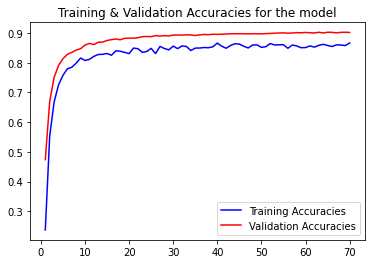

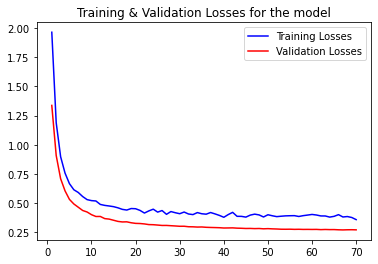

In [ ]:
plot_measures(history)

**NOTE**: These graphs illustrate that the pre-trained model pertains high efficiency in comparison to our previous examples. The model does not overfit. Validation Accuracy can be recorded at 90% and fairly steady. There are no harsh varying peaks.

# Fine Tuning (Last Convolutional Block only)

Training the Last Convolutional Block:

In [ ]:
#Convolution Base transforms to True
conv_base.trainable = True

#Excluding the last nine layers, trainable is set to False. Weights are also frozen for all layers except the last 9.
for layer in conv_base.layers[:-9]:
    layer.trainable=False

#For the last 9 layers, trainable is set to True. (the last convolutional block in DENSENET121). Weight is unfrozen for those respective layers.
for layer in conv_base.layers[-9:]:
    layer.trainable=True

Using a reduced learning rate, the model is trained again with iterations having increased patience in order to carry out Early Stopping:

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=1e-3, restore_best_weights=True)


model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

#Further tuning the model by fitting it for more epochs:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = math.ceil(train_generator.samples/BATCH_SIZE) ,
            epochs = 120,
            validation_steps = math.ceil(validation_generator.samples/BATCH_SIZE),
            callbacks=callback,
            verbose = 1)

Epoch 1/120
225/225 [==============================] - 32s 142ms/step - loss: 0.5085 - accuracy: 0.8162 - val_loss: 0.3029 - val_accuracy: 0.8890
Epoch 2/120
225/225 [==============================] - 31s 136ms/step - loss: 0.4741 - accuracy: 0.8311 - val_loss: 0.2912 - val_accuracy: 0.8907
Epoch 3/120
225/225 [==============================] - 30s 135ms/step - loss: 0.4507 - accuracy: 0.8376 - val_loss: 0.2882 - val_accuracy: 0.8968
Epoch 4/120
225/225 [==============================] - 30s 134ms/step - loss: 0.4272 - accuracy: 0.8420 - val_loss: 0.2851 - val_accuracy: 0.8950
Epoch 5/120
225/225 [==============================] - 30s 135ms/step - loss: 0.4402 - accuracy: 0.8414 - val_loss: 0.2831 - val_accuracy: 0.8947
Epoch 6/120
225/225 [==============================] - 31s 136ms/step - loss: 0.4192 - accuracy: 0.8447 - val_loss: 0.2811 - val_accuracy: 0.8979
Epoch 7/120
225/225 [==============================] - 31s 136ms/step - loss: 0.4488 - accuracy: 0.8300 - val_loss: 0.2788 -

#### Learning Curves

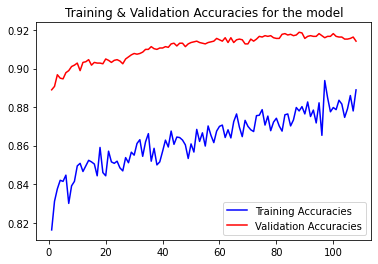

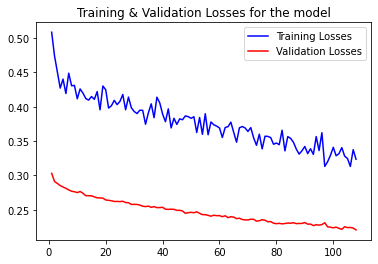

In [ ]:
plot_measures(history)

**NOTE**: With the result of fine tuning and being able to train the final convolutional block, a minor but salient improvement in the validation accuracy can be seen. We record peaks reaching 92% which is an all-time high value in comparison to our previous model version runs.

In [ ]:
#Save module to Disk
model.save("intel-finetuned.h5")

#Model Validation

### Image Generator (test)

In [ ]:
test_dir = os.path.join(baseDir, testDir)

#ImageDataGenerator reads test images:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size= (150, 150),
    batch_size= BATCH_SIZE,
    shuffle= False,
    class_mode= 'sparse')

Found 3000 images belonging to 6 classes.


###Model Accuracy (Transfer Learning version)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=math.ceil(test_generator.samples/BATCH_SIZE))
print('Test Data Accuracy', test_acc)

60/60 [==============================] - 4s 67ms/step - loss: 0.2651 - accuracy: 0.9057
Test Data Accuracy 0.9056666493415833


#Illustrating a Confusion Matrix Visualization

In [ ]:
predictions = model.predict(test_generator, steps=math.ceil(test_generator.samples/BATCH_SIZE))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_generator.classes, np.argmax(predictions, axis= 1), list(test_generator.class_indices.values()))

array([[387,   1,   0,   1,   5,  43],
       [  0, 472,   1,   0,   0,   1],
       [  1,   3, 474,  52,  22,   1],
       [  2,   3,  77, 428,  14,   1],
       [  7,   3,   6,   4, 488,   2],
       [ 31,   0,   0,   0,   2, 468]])

[Text(0, 0.5, 'buildings'),
 Text(0, 1.5, 'forest'),
 Text(0, 2.5, 'glacier'),
 Text(0, 3.5, 'mountain'),
 Text(0, 4.5, 'sea'),
 Text(0, 5.5, 'street')]

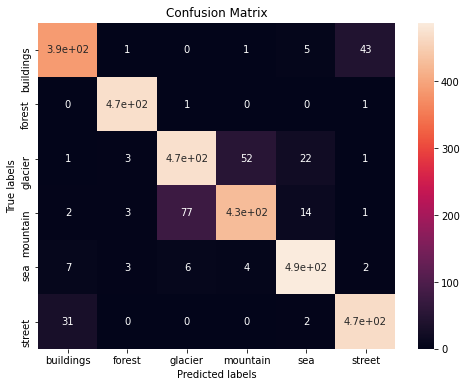

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(confusion_matrix(test_generator.classes, np.argmax(predictions, axis= 1), list(test_generator.class_indices.values())), 
            annot=True, ax = ax)

# Displaying titles, labels, and ticks. 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(test_generator.class_indices.keys())); ax.yaxis.set_ticklabels(list(test_generator.class_indices.keys()))

**NOTE**: The Confusion Matrix illustrates that the model incorrectly classifies categories "glacier" & "mountain" along with "building" & "street". 4.7e+02 for glacier is a True Positive (model identified glaciers correctly) and in contrast 4.3e+02 for mountains is a True Negative (they are pictures of glaciers, but the model predicted that they aren't). 77 pictures were classified as glaciers, but in actuality were not. 52 pictures were of glaciers, but the model predicted that they were of mountains.

# Research 

Awarded first place for Intel Image Classification, this solution used Transfer Learning, Progressive Image Resizing used Keras architecture ResNet50 [1]. Those pre-trained ImageNet weights were trained on a model with images incrementally increasing in size. We used DenseNet121, and did pretty much the same thing (pertaining to default image transformation, batch normalization and learning rate optimizer). Their test accuracy was 94%. However, they also used Places365 Dataset Weights for ResNet50 transfer learning and attained test accuracy of 95%. 

kNN with Embeddings was another approach that they took, and is commonly described as the representation of images via feature vectors which is predominantly the model's last layer output before softmax activation (also known as few-shot learning). 

Test Time Augmentation was also another approach that they used. This method consitutes more or less of the same mechanism as Data Augmentation, the difference being that augmented images are shown to the model several times[2]. The predictions of each corresponding image are then averaged, and that is proclaimed the final guess. 

In terms of test performance, in this assignment we managed to achieve a test accuracy of 90% compared to the maximum achieved by the researched winning model which was 95%. We used DenseNet primarily because each layer in the network received additional input from its preceding layers and henceforth all subsequent layers received said DenseNet feature maps. This results in a network that has a fewer number of channels, resulting in enhanced computing efficiency[3]. 

Additionally (and in contrast to typical ResNet versions), for our model, DenseNet121 ensures that there is no vanishing-gradient, enhances feature propagation, enables the re-use of features, and largely cuts back on the number of parameters[4]. 

The list of approaches mentioned above are only some of the myriad ways that many people have approached the Intel Image Classification problem. 

**References**: 
1) https://towardsdatascience.com/1st-place-solution-for-intel-scene-classification-challenge-c95cf941f8ed

2) https://towardsdatascience.com/test-time-augmentation-tta-and-how-to-perform-it-with-keras-4ac19b67fb4d

3) https://towardsdatascience.com/review-densenet-image-classification-b6631a8ef803

4) https://arxiv.org/abs/1608.06993
